# Homework 3

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    c) Discuss the complexity of each method.

    d) For graduate students who have projects: read the paper, and provide a short summary about your project

In [1]:
from typing import Callable
import time
import matplotlib.pyplot as plt
import numpy as np

def fib_recursion(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    """
    fib2 from class
    """
    if n == 0: return 0
    elif n == 1: return 1
    elif n > 40:
        raise RecursionError('This will take forever, lets save some time!')
    else: return fib_recursion(n-1)+fib_recursion(n-2)

def fib_tabulation(n):
    """
    fib4 from class
    """
    table=[0]*(n+1)
    table[1] = 1
       
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    for i in range(2,n+1):
        table[i]=table[i-2]+table[i-1]
        
    return table[n]

def arrpow(arr, n):
    """
    Power of matrix
    """
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib_matrix(n):
    """
    fib5 from class
    """
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

def get_fib_time(func:Callable,n:int)->float:
    """
    Get the time to compute the nth fibonacci number.
    
    Parameters
    ----------
    func : Callable
        The algorith to compute the number.
    n : int
        Which fibonacci number to compute.
    
    Returns
    -------
    float
        Time in seconds to compute the nth fibonacci number. In the case where we gave up,
        this should be `numpy.nan`.
    """
    start_time = time.time()
    try:
        _ = func(n)
        return time.time() - start_time
    except RecursionError:
        return np.nan
    

tabulation(524288) took 12.406046867370605 seconds


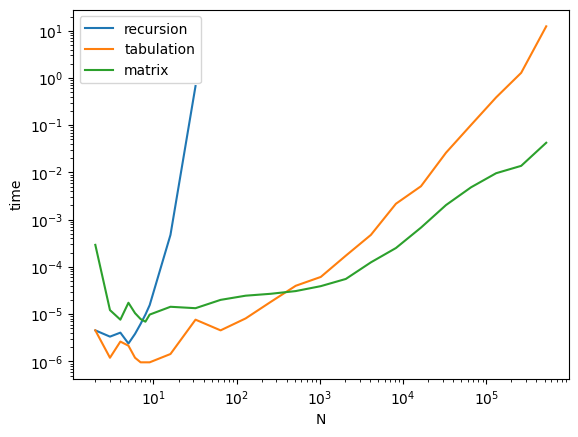

In [2]:
N = np.append(
    np.arange(2,10,dtype=int),
    2**np.arange(4,20,1,dtype=int)
)
timeout = 3.0

cases = [
    (fib_recursion, 'recursion','C0'),
    (fib_tabulation, 'tabulation','C1'),
    (fib_matrix, 'matrix','C2')
]
for (func,name,color) in cases:
    times = np.zeros(len(N))
    has_failed = False
    for i, n in enumerate(N):
        if has_failed:
            times[i] = np.nan
        else:
            result = get_fib_time(func,n)
            if result == np.nan:
                has_failed = True
            if result > timeout:
                has_failed = True
                print(f'{name}({n}) took {result} seconds')
            times[i] = result                
    plt.plot(N,times,label=name,color=color)
plt.legend()
plt.xlabel('N')
plt.ylabel('time')
plt.xscale('log')
plt.yscale('log')

## Complexity

#### Recursion

To compute `fib(n)` we must first compute `fib(n-1)` and `fib(n-2)`, creating a tree of computations whose complexity increases as $O(n^2)$.

#### Tabulation

To compute `fib(n)` we compute `fib(1)`, `fib(2)`, ... up to `n`, so there are $n$ calculations, or $O(n)$.

#### Matrix

To compute `arrpow(n)` we first compute `arrpow(n//2)`, so for any $n$ we must compute $\frac{n}{2}, \frac{n}{4}, \frac{n}{8}, ...$ or
$\frac{n}{2^i}$ for $i = 1,2,3,...$. Therefore, doubling $n$ adds only one additional computation, or the complexity is $O(\log{n})$.


## Project

For my project I will use Athena++ to investigate the maximum mass that a planet can accrete when it is embeded in a circumstellar disk. Differences in orbital frequency between the planet and the local disk create Limblad resonances which clear a gap in the disk at the planet's orbital radius. Eventually the gap will be so large that the planet no longer can accrete. The goal of this project is to find this final mass, and see how it is effected by the parameters of the disk (e.g viscosity, disk mass, planet semimajor axis). 